In [ ]:
import pandas as pd
import numpy as np
#visulization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
# data preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# handling class imbalance
from imblearn.over_sampling import SMOTE
# model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# evalution
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score
import pickle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('hearing_test.csv')
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [ ]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [ ]:
df.tail()

,age,physical_score,test_result
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1
4999,48.0,38.5,1


In [ ]:
df.shape

(5000, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [ ]:
df.describe(include='all')

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [ ]:
df.columns

Index(['age', 'physical_score', 'test_result'], dtype='object')

In [ ]:
df.dtypes

age               float64
physical_score    float64
test_result         int64
dtype: object

In [ ]:
df.isna().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [ ]:
df.nunique()

age                69
physical_score    404
test_result         2
dtype: int64

In [ ]:
df["physical_score"].max()


50.0

In [ ]:
df['age'].value_counts()

48.0    180
46.0    179
49.0    174
47.0    169
50.0    165
       ... 
90.0      1
87.0      1
23.0      1
85.0      1
86.0      1
Name: age, Length: 69, dtype: int64

In [ ]:
df['physical_score'].value_counts()

37.8    53
37.6    45
38.0    45
39.1    44
38.1    43
        ..
9.2      1
8.6      1
48.3     1
46.0     1
3.9      1
Name: physical_score, Length: 404, dtype: int64

In [ ]:
df['test_result'].value_counts()


1    3000
0    2000
Name: test_result, dtype: int64

## visualization

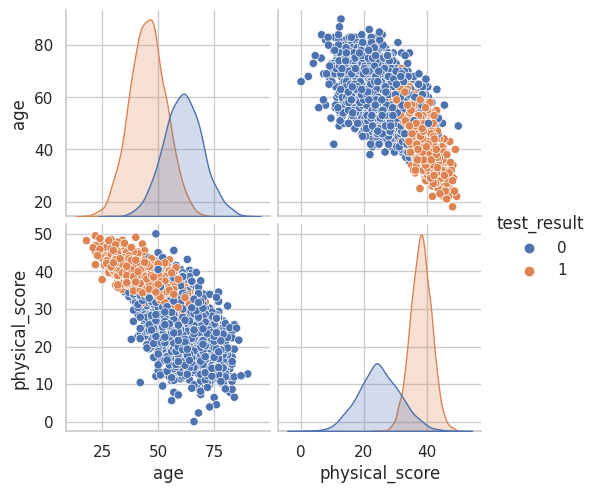

In [ ]:
# All information in one plot
sns.pairplot(df,hue='test_result')

<Axes: xlabel='test_result', ylabel='age'>

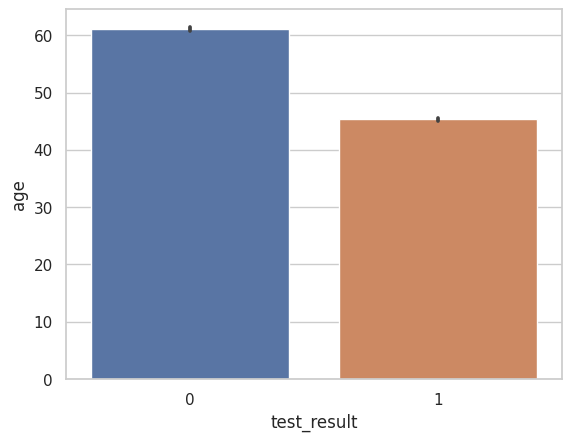

In [ ]:
sns.barplot(x="test_result",y="age",data=df)

<Axes: xlabel='test_result', ylabel='count'>

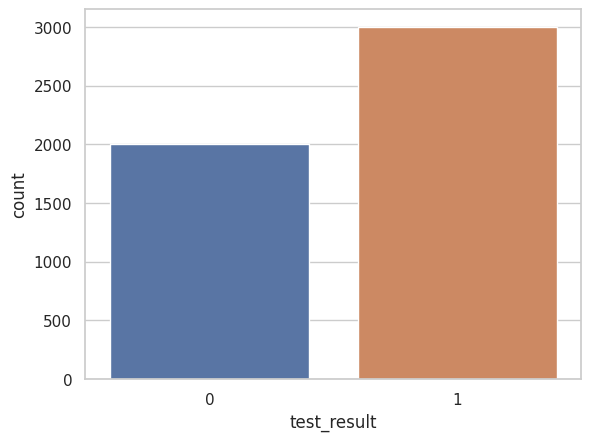

In [ ]:
sns.countplot(x="test_result",data=df)

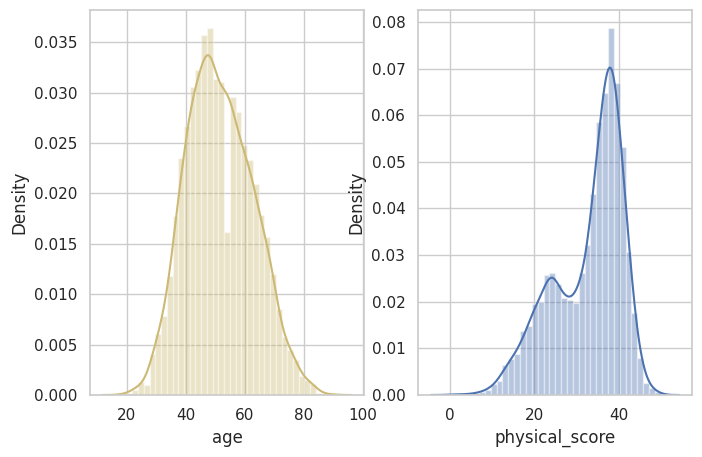

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(131)
sns.distplot(df["age"],color="y")
plt.subplot(132)
sns.distplot(df["physical_score"])
plt.show()


<Axes: xlabel='test_result', ylabel='physical_score'>

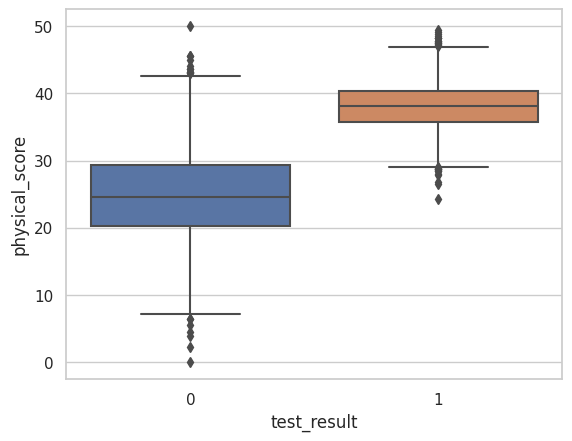

In [ ]:
plt.figure(dpi=100)
sns.boxplot(data=df, x='test_result',y='physical_score')


<Axes: xlabel='test_result', ylabel='age'>

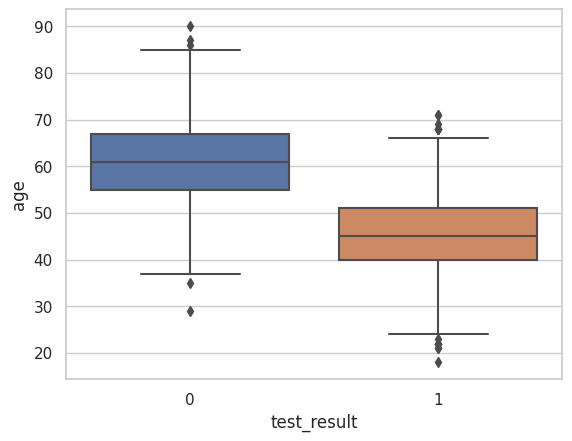

In [ ]:
plt.figure(dpi=100)
sns.boxplot(data=df, x='test_result',y='age')

<Axes: xlabel='age', ylabel='physical_score'>

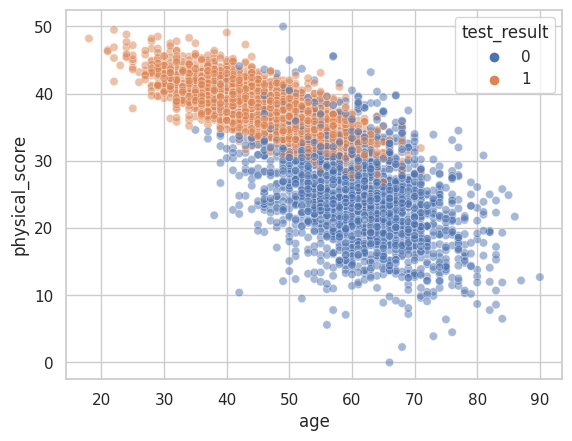

In [ ]:
plt.figure(dpi=100)
sns.scatterplot(data=df,x='age',y='physical_score',hue='test_result',alpha=0.5)

In [ ]:
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


<Axes: >

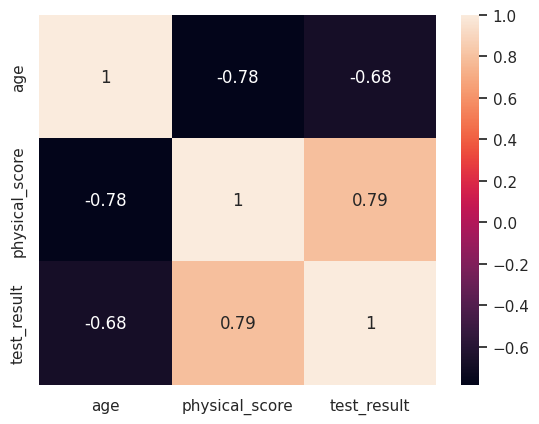

In [ ]:
sns.heatmap(df.corr(),annot=True)

##Drop target

In [ ]:
X = df.drop('test_result',axis = 1)
y = df['test_result']

In [ ]:
names = X.columns

## Standarscaler

In [ ]:
sc= StandardScaler()
x = sc.fit_transform(X)


In [ ]:
x

array([[-1.64887561,  0.97193719],
       [-0.14256762,  0.54348737],
       [ 0.03464508, -0.98669055],
       ...,
       [-0.23117397,  0.21296894],
       [-1.20584385,  1.66969832],
       [-0.31978033,  0.70262587]])

In [ ]:
x = pd.DataFrame(X)

## SMOTE

In [ ]:
# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)

x_bal, y_bal = smote.fit_resample(x, y)

## Train test split and
## Logistic

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score
lg=LogisticRegression()

log=lg.fit(x_bal, y_bal)

y_pred=lg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[786 100]
 [ 81 833]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       886
           1       0.89      0.91      0.90       914

    accuracy                           0.90      1800
   macro avg       0.90      0.90      0.90      1800
weighted avg       0.90      0.90      0.90      1800



## SVM

In [ ]:
# Train an SVM classifier on the resampled data
svm = SVC(kernel='rbf',C=2.0, random_state=42)
svm.fit(x_bal, y_bal)

# Make predictions on the test set
y_pred =svm.predict(X_test)

# Print classification report , confusion matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[791  95]
 [ 56 858]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       886
           1       0.90      0.94      0.92       914

    accuracy                           0.92      1800
   macro avg       0.92      0.92      0.92      1800
weighted avg       0.92      0.92      0.92      1800



## Randomforest

In [ ]:
RF = RandomForestClassifier()
RF.fit(x_bal, y_bal)


RandomForestClassifier()

In [ ]:
RFtrain =RF.predict(X_train)
RFtest =RF.predict(X_test)
# Print classification report , confusion matrix
print(confusion_matrix(RFtrain,y_train))
print(confusion_matrix(RFtest,y_test))
print(classification_report(RFtrain,y_train))
print(classification_report(RFtest,y_test))

[[2040   37]
 [  74 2049]]
[[850  22]
 [ 36 892]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2077
           1       0.98      0.97      0.97      2123

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       872
           1       0.98      0.96      0.97       928

    accuracy                           0.97      1800
   macro avg       0.97      0.97      0.97      1800
weighted avg       0.97      0.97      0.97      1800



In [ ]:
print( accuracy_score(RFtrain,y_train))
print(accuracy_score( RFtest,y_test))

0.9735714285714285
0.9677777777777777


## Testing

In [ ]:
## Tesing

RF.predict([[33,40.7]])

array([1])

In [ ]:
RF.predict([[56.0,31.0]])

array([0])

## pickle

In [ ]:
import pickle

In [ ]:
pickle.dump(RF,open("RF.pkl","wb"))